<a href="https://colab.research.google.com/github/puraminy/mini_proj2/blob/master/BAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data

In [0]:
import numpy as np

A = [-1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1]
tA = [-1, -1,-1] #tA = np.asmatrix([-1, 1]
B = [1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1]
tB = [-1, -1, 1]
C = [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]
tC = [-1,1,-1] #tC = np.asmatrix([1, 1])
D = [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1]
tD = [-1,1,1]
E = [1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1]
tE = [1,-1,-1]
F =[1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1]
tF = [1, -1, 1]
G = [-1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1]
tG = [1, 1, -1]
H = [1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1]
tH = [1, 1, 1]

X =[A,B,C,D,E,F,G,H]
Y = [tA,tB,tC,tD,tE,tF,tG,tH]

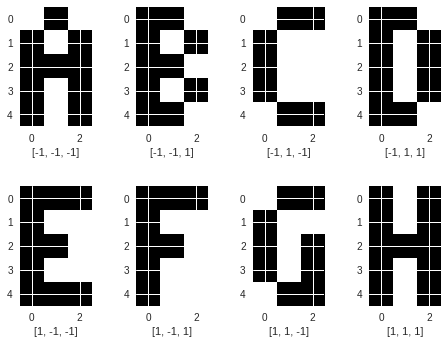

In [0]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

for i in range(4):
  axes[0,i].imshow(np.reshape(X[i],[5,3]))
  xlabel = Y[i]; axes[0,i].set_xlabel(xlabel)
  axes[1,i].imshow(np.reshape(X[i+4],[5,3]))
  xlabel = Y[i+4]; axes[1,i].set_xlabel(xlabel)



##BAM Weight

In [0]:
def BAM1(X,Y):
  X = np.asarray(X)
  Y = np.asarray(Y)
  n,m1 = X.shape
  n,m2 = Y.shape
  W=np.zeros([m1,m2])
  for i in range(n):
    W =W + np.matmul(np.transpose(np.asmatrix(X[i,:])),np.asmatrix(Y[i,:]))
  
  return W

W = BAM1(X,Y)
W


matrix([[ 2., -2.,  6.],
        [-2., -2., -2.],
        [ 6.,  2., -2.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [-4.,  0.,  4.],
        [ 0.,  0.,  0.],
        [ 2., -6.,  2.],
        [ 0.,  4.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [-2.,  2.,  2.],
        [ 0., -4.,  4.],
        [-2.,  2., -2.],
        [ 2.,  2., -6.]])

##BAM Net

In [0]:
def BAM2(W, IN, OUT = []):
  IN = np.asarray(IN)
  m,n = W.shape
  if IN.shape == (m,):
    W = W
  elif IN.shape == (n,):
    W = np.transpose(W)
  m,n = W.shape
  x = np.expand_dims(IN, axis = 0)
    
  if OUT == []:
    y = np.sign(np.matmul(x,W)) 
  else:
    y = np.asarray(OUT)
    y = np.expand_dims(y, axis = 0)
  #x_out = np.sign(np.matmul(y, np.transpose(W)))
  x_in = np.matmul(y, np.transpose(W))
  for i in range(m):
    if x_in[0,i]>0:
      x_in[0,i] = 1
    elif x_in[0,i]<0:
      x_in[0,i] = -1
    elif x_in[0,i]==0:
      x_in[0,i] = x[0,i]
  x_out = x_in
    
  while np.max((x - x_out)) !=0 or np.min((x - x_out)) !=0:
    x = x_out 
    y_in = np.matmul(x,W)
    for i in range(n):
      if y_in[0,i]>0:
        y_in[0,i] = 1
      elif y_in[0,i]<0:
        y_in[0,i] = -1
      elif y_in[0,i]==0:
        y_in[0,i] = y[0,i]
    y = y_in
    
    #y = np.sign(np.matmul(x,W))
    x_in = np.matmul(y, np.transpose(W))
    for i in range(m):
      if x_in[0,i]>0:
        x_in[0,i] = 1
      elif x_in[0,i]<0:
        x_in[0,i] = -1
      elif x_in[0,i]==0:
        x_in[0,i] = x[0,i]
    x_out = x_in
    #x_out = np.sign(np.matmul(y, np.transpose(W)))
  return y, x

y,x = BAM2(W, H)
print (y,x)
print (tH)
#plt.imshow(np.reshape(y, [5,3]))

[[ 1. -1.  1.]] [[ 1. -1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1. -1.]]
[1, 1, 1]


##Hamming (X-layer)

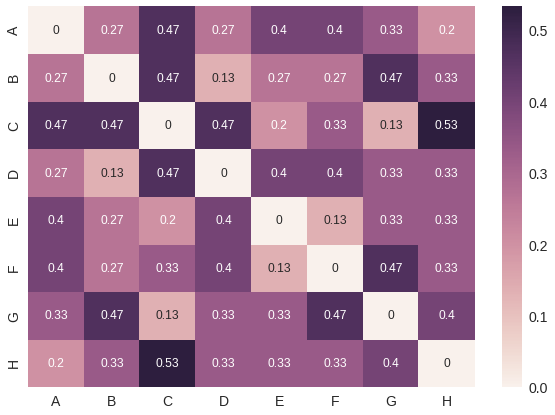

In [0]:
import matplotlib.pyplot as plt
import scipy.spatial.distance as dis

hammX = np.zeros((len(X),len(X)))
for i in range(len(X)):
  for j in range(len(X)):
    hammX[i,j] = dis.hamming(X[i],X[j])
    
# Visualizing of Hamming Distance
import seaborn as sn
import pandas  as pd

df_hammX = pd.DataFrame(hammX, range(len(X)),
                  range(len(X)))
axlabels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_hammX, annot=True,annot_kws={"size": 12}, xticklabels=axlabels, yticklabels=axlabels)# font size
plt.show()

##Hamming (Y-layer)

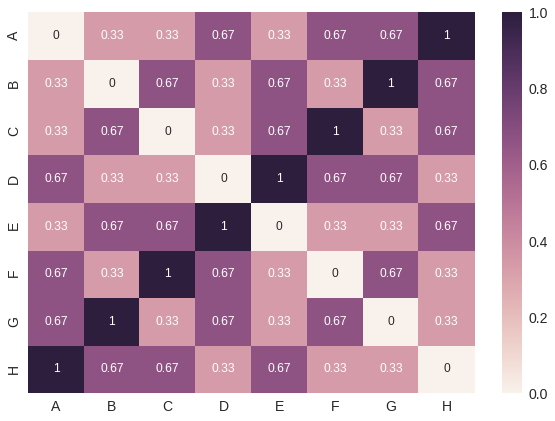

In [0]:
import matplotlib.pyplot as plt
import scipy.spatial.distance as dis

hammY = np.zeros((len(Y),len(Y)))
for i in range(len(Y)):
  for j in range(len(Y)):
    hammY[i,j] = dis.hamming(Y[i], Y[j])
    
# Visualizing of Hamming Distance
import seaborn as sn
import pandas  as pd

df_hammY = pd.DataFrame(hammY, range(len(Y)),
                  range(len(X)))
axlabels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_hammY, annot=True,annot_kws={"size": 12}, xticklabels=axlabels, yticklabels=axlabels)# font size
plt.show()

##Test data generation with noise

In [0]:
import random
def test_noise (inp, te_n, n_n): #inp:input vector te_n: number of noisy samples for test. n_n: number of noisy elements
  test = []
  for i in range(te_n):
    rnd = random.sample(range(len(inp)), n_n)
    noise = np.asarray(inp)
    for i in rnd:
      noise[i] = 0
    test.append(noise)
    
  test=np.asarray(test)
  test = np.unique(test,axis=0)
 
  return test
print(A)
t=test_noise(A, 5, 2)
print(t)


[-1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1]
[[-1  1 -1  1 -1  1  0  1  1  1 -1  1  1  0  1]
 [-1  1 -1  1 -1  1  0  1  1  1  0  1  1 -1  1]
 [-1  1 -1  1 -1  1  1  0  1  1 -1  1  1 -1  0]
 [-1  1 -1  1 -1  1  1  1  1  0  0  1  1 -1  1]
 [-1  1 -1  1 -1  1  1  1  1  1  0  1  1  0  1]]


#(a)

###Test 1

In [0]:
TA = [-1, 1]
TC = [1, 1]
Wa = BAM1([A,C], [TA, TC])
print(Wa)

C1 = [-1, 0, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]
yc1,xc1 = BAM2(Wa, C1)
print (yc1,xc1)
print('A:', A )
print('C:', C )

[[ 0. -2.]
 [ 0.  2.]
 [ 2.  0.]
 [ 0.  2.]
 [ 0. -2.]
 [-2.  0.]
 [ 0.  2.]
 [-2.  0.]
 [-2.  0.]
 [ 0.  2.]
 [ 0. -2.]
 [-2.  0.]
 [-2.  0.]
 [ 2.  0.]
 [ 0.  2.]]
[[1. 1.]] [[-1.  1.  1.  1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1.]]
A: [-1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1]
C: [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]


###Test 2

In [0]:
yc2,xc2 = BAM2(Wa, [1,0])
print (yc2,xc2)
print('C:', C )

[[ 0.  0.  1.  0.  0. -1.  0. -1. -1.  0.  0. -1. -1.  1.  0.]] [[1 0]]
C: [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]


###Test 3

In [0]:
yc3,xc3 = BAM2(Wa, [1,0], C1)
print (yc3,xc3)
print('C:', C )

[[-1.  1.  1.  1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1.]] [[1. 1.]]
C: [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]


###Test 4

In [0]:
C2 = [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
yc4,xc4 = BAM2(Wa, C2)
print (yc4,xc4)
print('C:', C )
print('A:', A )

[[1. 1.]] [[-1.  1.  1.  1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1.]]
C: [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]
A: [-1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1]


###Test 5

In [0]:
C2 = [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
yc4,xc4 = BAM2(Wa, [1,0], C2)
print (yc4,xc4)
print('C:', C )
print('A:', A )

[[-1.  1.  1.  1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1.]] [[1. 1.]]
C: [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1]
A: [-1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1]


#(b)

In [0]:
WAB=BAM1([A,B], [tA,tB])
print('WAB:',-np.sum(np.abs(WAB)))
WAC=BAM1([A,C], [tA,tC])
print('WAC:',-np.sum(np.abs(WAC)))
WAD=BAM1([A,D], [tA,tD])
print('WAD:',-np.sum(np.abs(WAD)))
WAE=BAM1([A,E], [tA,tE])
print('WAE:',-np.sum(np.abs(WAE)))

print('Wa:',-np.sum(np.abs(Wa)))
print('W:',-np.sum(np.abs(W)))

WAB: -52.0
WAC: -46.0
WAD: -38.0
WAE: -48.0
Wa: -30.0
W: -78.0


##Part III (Low Noise)

In [0]:
W3 = BAM1([A,D,F,G],[tA,tD,tF,tG])
print(W3)
[x3A, y3A] = BAM2(W3,G)
print(x3A, y3A)

[[ 0.  0.  4.]
 [ 0.  0.  0.]
 [ 4.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [-4.  0.  0.]
 [ 0.  0.  0.]
 [ 0. -4.  0.]
 [-2.  2. -2.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [-2.  2. -2.]
 [-2. -2.  2.]
 [ 0.  4.  0.]
 [ 0.  0. -4.]]
[[ 1.  1. -1.]] [[-1  1  1  1 -1 -1  1 -1  1  1 -1  1 -1  1  1]]


In [0]:
W4 = BAM1([C,D,E,H],[tC,tD,tE,tH])
yd4,xd4 = BAM2(W4,D, tD)
print (yd4,xd4)
print('D:', D )
print('tD:', tD )
ye4,xe4 = BAM2(W4,E, tE)
print (ye4,xe4)
print('E:', E )
print('tE:', tE )
yf4,xf4 = BAM2(W4,F, tF)
print (yf4,xf4)
print('F:', F )
print('tF:', tF )

[[-1  1  1]] [[ 1  1 -1  1 -1  1  1 -1  1  1 -1  1  1  1 -1]]
D: [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1]
tD: [-1, 1, 1]
[[ 1. -1. -1.]] [[ 1.  1.  1. -1.  1. -1. -1.  1. -1. -1.  1. -1.  1.  1.  1.]]
E: [1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1]
tE: [1, -1, -1]
[[ 1. -1.  1.]] [[ 1. -1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1. -1.]]
F: [1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1]
tF: [1, -1, 1]


In [0]:
teA10=test_noise (A, 70, 2)
teA10.shape

(53, 15)

##Accuracy

In [0]:
#x,y=BAM2(W,teA10[i,:])
import scipy.spatial.distance as dis

teB10=test_noise (B, 70, 2)

def accuracy(test, t, W): #test matrix, t: output, W: Weight
  j=0
  n=len(test[:,0])
  for i in range(n):
    x,y=BAM2(W,test[i,:])
    if dis.hamming(x, t)==0:
      j=j+1
  acc=j/n
  return acc

accuracy(teB10, tB, W)

1.0

##Test and Evaluate on 100 noisy patterns for every target pattern

In [0]:
test=[]
acc=[]
for i in range(8):
  test.append(test_noise (X[i], 100, 2))
  acc.append(accuracy(test[i], Y[i], W))
  
print(np.mean(acc))
print(acc)

0.2431344696969697
[0.6875, 1.0, 0.0, 0.25757575757575757, 0.0, 0.0, 0.0, 0.0]


##Test and Evaluate on 100 noisy patterns for every target pattern

In [0]:
test=[]
acc=[]
for i in range(8):
  test.append(test_noise (X[i], 100, 5))
  acc.append(accuracy(test[i], Y[i], W))
  
print(np.mean(acc))
print(acc)

0.2607325809111523
[0.5151515151515151, 1.0, 0.0, 0.49, 0.01020408163265306, 0.02, 0.0, 0.050505050505050504]


##Part V

In [0]:
Yv = [tC,tE]
Wv = BAM1([C,E],Yv)

test=[]
acc=[]
for i in range(len(Yv)):
  test.append(test_noise (X[i], 100, 1))
  acc.append(accuracy(test[i], Yv[i], Wv))
  
print(np.mean(acc))
print(acc)

0.0
[0.0, 0.0]
